In [227]:
import pandas as pd

UNKNOWN = 'unknown'

In [228]:
# Read in the data from the CSV file into a a dataframe 
df = pd.read_csv('coded_log.csv', sep=";",names=['userId', '1?', 'date','eventType','application','2?','ip','3?','4?','5?'])

In [229]:
# Visualize a snippet of the data frame df
df.head(10)

,userId,1?,date,eventType,application,2?,ip,3?,4?,5?
0,1,10036,2021-05-11 18:48:34.000,1,HRW,NaN,NaN,xxx,,o8zeb75bwa
1,1,64429,2021-04-17 12:04:05.000,1,HRW,NaN,NaN,xxx,,gud00usqus
2,1,78248,2021-05-16 00:04:05.000,1,HRW,NaN,NaN,xxx,,dl5ncrxi13
3,1,148583,2021-06-19 21:32:23.000,1,HRW,NaN,NaN,xxx,,j9m8itiaka
4,1,180593,2021-03-29 15:03:36.000,1,HRW,NaN,NaN,xxx,,r3649bgcxn
5,1,436612,2021-03-23 15:04:01.000,1,HRW,NaN,NaN,xxx,,q2xposd8fx
6,1,478900,2021-04-30 08:34:03.000,1,HRW,NaN,NaN,xxx,,squqm84joa
7,1,562910,2021-06-25 08:01:30.000,1,HRW,NaN,NaN,xxx,,cx4iagls3j
8,1,563290,2021-06-02 10:46:15.000,1,HRW,NaN,NaN,xxx,,ow1gzqachr
9,1,613000,2021-05-17 20:20:27.000,1,HRW,NaN,NaN,xxx,,zj66xzdnj6


In [230]:
#remove unkown coloums
df_ = df.drop(columns=['1?','2?','3?','4?','5?'])

df_.head(10)

,userId,date,eventType,application,ip
0,1,2021-05-11 18:48:34.000,1,HRW,NaN
1,1,2021-04-17 12:04:05.000,1,HRW,NaN
2,1,2021-05-16 00:04:05.000,1,HRW,NaN
3,1,2021-06-19 21:32:23.000,1,HRW,NaN
4,1,2021-03-29 15:03:36.000,1,HRW,NaN
5,1,2021-03-23 15:04:01.000,1,HRW,NaN
6,1,2021-04-30 08:34:03.000,1,HRW,NaN
7,1,2021-06-25 08:01:30.000,1,HRW,NaN
8,1,2021-06-02 10:46:15.000,1,HRW,NaN
9,1,2021-05-17 20:20:27.000,1,HRW,NaN


In [231]:
#cleaning row data

print('number of null entries:')
df_.isnull().sum()

number of null entries:


userId              0
date                0
eventType           0
application         0
ip             339741
dtype: int64

In [232]:
df_['ip'].fillna(UNKNOWN,inplace=True)

df_.head(10)

,userId,date,eventType,application,ip
0,1,2021-05-11 18:48:34.000,1,HRW,unknown
1,1,2021-04-17 12:04:05.000,1,HRW,unknown
2,1,2021-05-16 00:04:05.000,1,HRW,unknown
3,1,2021-06-19 21:32:23.000,1,HRW,unknown
4,1,2021-03-29 15:03:36.000,1,HRW,unknown
5,1,2021-03-23 15:04:01.000,1,HRW,unknown
6,1,2021-04-30 08:34:03.000,1,HRW,unknown
7,1,2021-06-25 08:01:30.000,1,HRW,unknown
8,1,2021-06-02 10:46:15.000,1,HRW,unknown
9,1,2021-05-17 20:20:27.000,1,HRW,unknown


In [233]:
#DATA CLEANING 

#print(type(df_['eventType'][0])
print(df_['eventType'].dtypes)

#check data consistency delete rows containing non-valid event code
df_ = df_[(df_.eventType >= 1) & (df_.eventType <= 3)]

#check data rendundancy
duplicates = df_.duplicated().sum()
if(duplicates > 0):
    print(f'Duplicates number {duplicates} on {len(df_.index)}')
    df_.drop_duplicates(inplace = True)
    print(f'New size:{len(df_.index)}')


int64
Duplicates number 3432 on 849552
New size:846120


<h3>Numerosity reduction</h3>

In [234]:
# counting unique values
userIdNumber = len(pd.unique(df_['userId']))
userIdNumber

18080

In [235]:
# group by the userId
df_groupbyUserId = df_.groupby('userId')
#userIdCount = df_groupbyUserId.userId.cout
users_id = []
for key, value in df_groupbyUserId:
    users_id.append(key)
# user_id - value 
usersdIpAmount = df_groupbyUserId["ip"].nunique()
# user_id - value
failedAttemps = {}
successAttemps = {}
def f(x):
    return x == 2
for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    #filter(f,user_group)
    ctr = user_group[user_group["eventType"] == 2].count()
    failedAttemps[i] = ctr["eventType"]
    ctr = user_group[user_group["eventType"] == 1].count()
    successAttemps[i] =ctr["eventType"]
    
print(successAttemps)




{1: 9677, 10: 0, 17: 9, 18: 0, 21: 28, 24: 12, 29: 993, 32: 1, 33: 6, 34: 21, 35: 669, 36: 200, 37: 15, 38: 275, 39: 16, 40: 42, 41: 216, 43: 481, 44: 667, 45: 266, 47: 6, 48: 0, 50: 64, 52: 3, 53: 45, 60: 0, 67: 0, 72: 0, 79: 0, 82: 0, 87: 0, 91: 0, 100: 0, 105: 0, 117: 0, 123: 0, 131: 0, 137: 0, 152: 0, 168: 0, 170: 0, 184: 0, 190: 504, 191: 158, 193: 4, 195: 892, 197: 400, 198: 433, 199: 161, 203: 9, 204: 3, 205: 60, 206: 34, 207: 33, 208: 22, 209: 38, 210: 11, 211: 4, 214: 100, 218: 26, 221: 43, 222: 97, 223: 36, 224: 8, 225: 5, 226: 24, 228: 33, 230: 59, 232: 1, 233: 9, 234: 36, 236: 48, 237: 25, 238: 19, 240: 25, 241: 5, 242: 26, 243: 15, 244: 15, 245: 34, 249: 150, 250: 13, 251: 41, 253: 66, 254: 9, 255: 45, 256: 0, 257: 26, 258: 32, 259: 4, 260: 11, 261: 14, 262: 34, 263: 17, 264: 45, 265: 24, 266: 17, 267: 27, 268: 28, 269: 45, 271: 13, 272: 30, 273: 19, 275: 21, 277: 5, 278: 15, 279: 110, 280: 39, 281: 36, 282: 124, 284: 106, 285: 55, 288: 84, 289: 21, 290: 18, 291: 16, 292: 

In [236]:
# Need to reduce the numerosity of userId 1
df_user1 = df_[df_.userId == 1]
df_user1

,userId,date,eventType,application,ip
0,1,2021-05-11 18:48:34.000,1,HRW,unknown
1,1,2021-04-17 12:04:05.000,1,HRW,unknown
2,1,2021-05-16 00:04:05.000,1,HRW,unknown
3,1,2021-06-19 21:32:23.000,1,HRW,unknown
4,1,2021-03-29 15:03:36.000,1,HRW,unknown
...,...,...,...,...,...
9675,1,2021-05-20 11:18:33.000,1,HRW,unknown
9676,1,2021-04-07 15:18:14.000,1,HRW,unknown
9677,1,2021-06-22 20:01:11.000,1,HRW,unknown
9678,1,2021-05-31 20:01:24.000,1,HRW,unknown


In [237]:
df_.groupby('eventType').eventType.count()

eventType
1    628356
2     92058
3    125706
Name: eventType, dtype: int64

<h3>Login dataframe</h3>

In [238]:
# constants

START_WORKING = 8
END_WORKING = 19

In [239]:
# lambda functions

isWorkingTime = lambda x: x.isoweekday() in range(1,5) and x.to_pydatetime().hour >= START_WORKING and x.to_pydatetime().hour <= END_WORKING

# toDay: convert a stirng representing a date into a number 
#    1 --> Monday
#    2 --> Tuesday
#    ...
#    7 --> Sunday
toDay = lambda x: x.isoweekday() 


In [247]:
#setting up the 1st datase
df_logins = pd.DataFrame(columns=['userId', 'date', 'day', 'workingTime', 'eventType', 'application'])
df_logins['userId'] = df_['userId']
df_logins['date'] = pd.to_datetime(df_['date'], format="%Y-%m-%d %H:%M:%S.%f")
df_logins['day'] = df_logins['date'].apply(toDay)
df_logins['workingTime'] = df_logins['date'].apply(isWorkingTime)
df_logins['eventType'] = df_['eventType']
df_logins['application'] = df_['application']

df_logins

,userId,date,day,workingTime,eventType,application
0,1,2021-05-11 18:48:34,2,True,1,HRW
1,1,2021-04-17 12:04:05,6,False,1,HRW
2,1,2021-05-16 00:04:05,7,False,1,HRW
3,1,2021-06-19 21:32:23,6,False,1,HRW
4,1,2021-03-29 15:03:36,1,True,1,HRW
...,...,...,...,...,...,...
849547,33952,2021-06-23 08:45:56,3,True,1,ERM
849548,33953,2021-06-23 08:07:16,3,True,1,ERM
849549,33954,2021-06-23 10:18:33,3,True,1,ERM
849550,33961,2021-06-24 08:58:23,4,True,1,ERM


In [241]:
df_logins.groupby('day').day.count()

day
1    177305
2    160928
3    147704
4    160551
5    154631
6     25318
7     19683
Name: day, dtype: int64

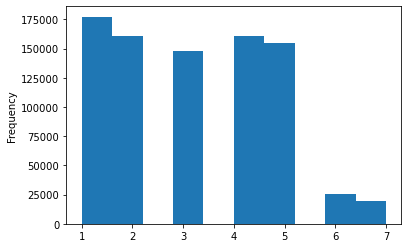

In [242]:
import matplotlib.pyplot as plt

# number of event per day
df_logins['day'].plot.hist()
plt.show()


In [243]:
# lambda 

In [248]:
# setting up 2nd dataset
df_users = pd.DataFrame(columns=["userId","usedIpAmount","avgLoginTime","failedAttemps","successAttemps"])
df_users["userId"] = users_id
df_users["usedIpAmount"] = usedIpAmount
df_users["failedAttemps"] = failedAttemps.values()
df_users["successAttemps"] = successAttemps.values()
df_users


,userId,usedIpAmount,avgLoginTime,failedAttemps,successAttemps
0,1,NaN,NaN,1,9677
1,10,2.0,NaN,2,0
2,17,NaN,NaN,9,9
3,18,NaN,NaN,4,0
4,21,NaN,NaN,2,28
...,...,...,...,...,...
18075,33952,NaN,NaN,0,1
18076,33953,NaN,NaN,0,1
18077,33954,NaN,NaN,0,1
18078,33961,NaN,NaN,0,1
